<div class="alert alert-info">
View notebook in interactive mode for using hyperlinks and correct display of markdown:<br>
<a href='https://nbviewer.org/github/yulianikola/portfolio/blob/master/english/data_analysis_python/visualization/human_freedom_eng.ipynb'>human_freedom</a></div>

### Visualization
#### Human Freedom Index data

Data desсription:<br>
Values of Human Freedom Index (HFI), its subindexes and components for 2008-2018, by countries.<br>
The indicators reflect, for example, freedom of trade, freedom of speech and religion, crime rate, rule of law, freedom of movement, etc.<br>
https://www.kaggle.com/gsutters/the-human-freedom-index?select=hfi_cc_2020.csv

Additional information from HFi report:<br>
https://www.cato.org/sites/cato.org/files/2021-01/human-freedom-index-2018.pdf

#### Task:
Conduct basic exploratory data analysis using visualization methods.

<p id="0">
<h4>Table of contents</h4>
<ul type="square">
<a href="#01"><li>Explore the data</li></a>
<a href="#1"><li>HFI dynamic</li></a>
    <ul>
    <a href="#1.1"><li>World average</li></a>
    <a href="#1.2"><li>On average by region</li></a>
    <a href="#1.3"><li>For regions above/below average</li></a>
    <a href="#1.4"><li>Russia: comparison with region and world</li></a>
    </ul>
<a href="#2"><li>Top countries for increase/decrease of HFI</li></a>
<a href="#3"><li>Top countries by HFI in 2008 and 2018</li></a>
<a href="#4"><li>Dynamic of HFI components</li></a>
<a href="#5"><li>Dynamic of Russia's rank</li></a>
<a href="#6"><li>Freedom of identity indicator 2018 vs 2008</li></a>
        <ul>
        <a href="#6.1"><li>By region</li></a>
        <a href="#6.2"><li>By countries in South Asia</li></a>
        </ul>
<a href="#7"><li>Comparison of Russia and Iran by HFI and components</li></a>
<a href="#8"><li>Distribution of HFI and components in 2018</li></a>
<a href="#9"><li>Correlation of HFI and components</li></a>
<a href="#10"><li>HFI and components on average by region</li></a>
<a href="#11"><li>HFI distribution 2018 vs 2008</li></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

<p id="01">
<h4>Explore the data</h4>

Upload the data,  specify the use of the zero column as an index column:

In [2]:
hfi = pd.read_csv('C:\\python\\portfolio\\data_analysis_python\\4_visualisation\\data\\human_freedom.csv', index_col = 0)

Dataset contains 112 columns and 1782 rows:

In [3]:
hfi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1782 entries, 0 to 1781
Columns: 112 entries, year to womens_freedom
dtypes: float64(108), int64(1), object(3)
memory usage: 1.5+ MB


To display all columns, change the setting:

In [4]:
pd.set_option('display.max_columns', 120)
hfi.head(5)

,year,ISO_code,countries,region,hf_score,hf_rank,hf_quartile,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,pf_ss_disappearances_violent,pf_ss_disappearances_organized,pf_ss_disappearances_fatalities,pf_ss_disappearances_injuries,pf_ss_disappearances,pf_ss_women_fgm,pf_ss_women_inheritance,pf_ss_women,pf_ss,pf_movement_domestic,pf_movement_foreign,pf_movement_women,pf_movement,pf_religion_freedom,pf_religion_repression,pf_religion_harassment,pf_religion_restrictions,pf_religion,pf_association_entry,pf_association_assembly,pf_association_barries,pf_association_bans,pf_association_estopparties,pf_association_opposition,pf_association_civilrepression,pf_association,pf_expression_killed,pf_expression_jailed,pf_expression_media,pf_expression_cable,pf_expression_newspapers,pf_expression_control,pf_expression,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_government_consumption,ef_government_transfers,ef_government_enterprises,ef_government_tax_income,ef_government_tax_payroll,ef_government_tax,ef_government_soa,ef_government,ef_legal_judicial,ef_legal_courts,ef_legal_protection,ef_legal_military,ef_legal_integrity,ef_legal_enforcement,ef_legal_regulatory,ef_legal_police,ef_legal_gender,ef_legal,ef_money_growth,ef_money_sd,ef_money_inflation,ef_money_currency,ef_money,ef_trade_tariffs_revenue,ef_trade_tariffs_mean,ef_trade_tariffs_sd,ef_trade_tariffs,ef_trade_regulatory_nontariff,ef_trade_regulatory_compliance,ef_trade_regulatory,ef_trade_black,ef_trade_movement_foreign,ef_trade_movement_capital,ef_trade_movement_visit,ef_trade_movement,ef_trade,ef_regulation_credit_ownership,ef_regulation_credit_private,ef_regulation_credit_interest,ef_regulation_credit,ef_regulation_labor_minwage,ef_regulation_labor_firing,ef_regulation_labor_bargain,ef_regulation_labor_hours,ef_regulation_labor_dismissal,ef_regulation_labor_conscription,ef_regulation_labor,ef_regulation_business_adm,ef_regulation_business_bureaucracy,ef_regulation_business_start,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,womens_freedom
0,2018,ALB,Albania,Eastern Europe,7.81,43.0,2.0,6.0,4.8,4.3,5.0,9.1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,7.5,8.8,9.3,10.0,10.0,10.0,10.0,9.0,9.0,9.6,8.0,8.9,8.8,10.0,7.8,8.2,8.0,7.8,8.2,8.6,10.0,10.0,5.0,10.0,10.0,10.0,9.2,0.0,10.0,10.0,10.0,7.5,5.8,7.81,49.0,8.2,6.7,8.0,9.0,7.0,8.0,9.5,8.1,3.6,3.7,4.9,8.3,5.7,3.9,6.7,5.6,1.0,5.2,10.0,9.7,9.6,10.0,9.8,9.7,9.3,8.1,9.0,6.8,9.4,8.1,10.0,4.2,4.6,8.3,5.7,8.2,10.0,9.2,10.0,9.7,5.6,4.9,5.6,8.0,6.3,10.0,6.7,5.7,6.7,9.7,5.4,5.6,7.2,6.7,7.7,7.80,26.0,9.26
1,2017,ALB,Albania,Eastern Europe,7.78,44.0,2.0,6.3,4.4,4.7,5.3,9.1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,7.5,8.8,9.3,10.0,10.0,10.0,10.0,8.2,9.0,9.6,8.0,8.7,7.9,10.0,8.0,8.2,8.1,7.9,8.3,8.4,10.0,10.0,5.0,10.0,10.0,10.0,9.2,0.0,10.0,10.0,10.0,7.5,5.8,7.86,47.0,8.1,6.7,8.0,9.0,7.0,8.0,6.2,7.4,3.8,3.9,5.1,8.3,5.5,4.4,6.6,6.8,1.0,5.4,9.2,9.7,9.6,10.0,9.6,9.6,9.3,8.1,9.0,6.0,9.4,7.7,10.0,4.2,5.4,8.3,5.9,8.2,10.0,9.1,10.0,9.7,5.6,5.4,6.4,8.0,6.3,10.0,6.9,6.3,6.7,9.7,6.0,6.0,7.2,7.0,7.9,7.70,36.0,9.26
2,2016,ALB,Albania,Eastern Europe,7.63,50.0,2.0,6.7,4.5,4.7,5.3,8.6,10.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,7.5,8.7,10.0,10.0,5.0,8.3,9.0,8.9,9.6,8.0,8.9,7.9,10.0,8.0,8.2,8.1,8.0,8.3,8.5,10.0,10.0,5.1,10.0,10.0,10.0,9.2,0.0,10.0,10.0,10.0,7.5,5.8,7.57,60.0,8.2,6.7,8.4,9.0,7.0,8.0,7.8,7.8,4.0,3.9,5.1,8.3,5.6,4.4,6.5,6.9,0.9,5.5,9.0,9.5,9.7,10.0,9.6,9.6,9.2,8.0,9.0,5.6,9.4,7.5,10.0,4.2,4.6,8.3,5.7,8.0,10.0,7.3,9.0,8.8,5.6,5.4,6.2,8.0,6.3,10.0,6.9,6.1,6.0,9.7,6.0,7.3,7.1,7.0,7.6,7.69,36.0,7.50
3,2015,ALB,Albania,Eastern Europe,7.55,52.0,2.0,6.7,4.5,4.7,5.2,8.9,10.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,7.5,8.8,5.0,10.0,5.0,6.7,9.0,8.9,9.2,8.5,8.9,7.9,10.0,8.0,8.2,8.1,8.0,8.3,8.5,10.0,10.0,5.3,10.0,10.0,10.0,9.2,0.0,10.0,10.0,10.0,7.5,5.8,7.40,6

For the further work select the following indexes/ranks/components:
* hf_score - Human Freedom Index
* hf_rank - Human Freedom Rank
* pf_score - Personal Freedom Index
* pf_rank - Personal Freedom Rank
* ef_score - Economic Freedom Index
* ef_rank - Economic Freedom Rank
* pf_ss - security and safety (organized conflicts, terrorism, disappearances, homicide)
* pf_movement_foreign - freedom of foreign movement
* pf_religion - freedom of religion
* pf_expression_media - freedom of media
* pf_identity - freedom of dentity and relationships (change of sex/gender, same-sex relationships, divorce)
* ef_legal - legal system and property rights (judicial independence, protection of property rights, reliability of police)
* ef_money - money growth, deviation of inflation
* ef_trade - international trade (tariffs, movement of capital)
* ef_regulation - credit market, labor market, business regulations<br><br>
For all indicators: the higher the value the "better / freer".

Create a dataframe with the chosen variables. It contains 18 columns, some of them containing the nulls. Data types are defined correctly, so there are no "non-numeric" symbols.

In [5]:
hfi_sample = hfi.loc[:,['year','countries','region','hf_score',
                        'hf_rank','pf_score','pf_rank','ef_score','ef_rank',
                       'pf_ss','pf_movement_foreign',
                       'pf_religion','pf_expression_media','pf_identity',
                       'ef_legal','ef_money','ef_trade','ef_regulation']]

In [6]:
hfi_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1782 entries, 0 to 1781
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 1782 non-null   int64  
 1   countries            1782 non-null   object 
 2   region               1782 non-null   object 
 3   hf_score             1702 non-null   float64
 4   hf_rank              1702 non-null   float64
 5   pf_score             1702 non-null   float64
 6   pf_rank              1702 non-null   float64
 7   ef_score             1702 non-null   float64
 8   ef_rank              1702 non-null   float64
 9   pf_ss                1702 non-null   float64
 10  pf_movement_foreign  1691 non-null   float64
 11  pf_religion          1771 non-null   float64
 12  pf_expression_media  1702 non-null   float64
 13  pf_identity          1702 non-null   float64
 14  ef_legal             1782 non-null   float64
 15  ef_money             1702 non-null   f

Drop the rows with null in HFI column:

In [7]:
hfi_sample = hfi_sample[hfi_sample.hf_score.notna()]

Number of rows reduced to 1702. There are still several indicators with not many nulls. For the purpose of visualization so far leave as it is.

In [8]:
hfi_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1702 entries, 0 to 1781
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 1702 non-null   int64  
 1   countries            1702 non-null   object 
 2   region               1702 non-null   object 
 3   hf_score             1702 non-null   float64
 4   hf_rank              1702 non-null   float64
 5   pf_score             1702 non-null   float64
 6   pf_rank              1702 non-null   float64
 7   ef_score             1702 non-null   float64
 8   ef_rank              1702 non-null   float64
 9   pf_ss                1702 non-null   float64
 10  pf_movement_foreign  1691 non-null   float64
 11  pf_religion          1693 non-null   float64
 12  pf_expression_media  1702 non-null   float64
 13  pf_identity          1702 non-null   float64
 14  ef_legal             1702 non-null   float64
 15  ef_money             1702 non-null   f

Have a look at statistics. Based on the information from the report zero values are not "nulls", but minimum value of indicators:

In [9]:
pd.set_option("precision", 3)
hfi_sample.describe()

,year,hf_score,hf_rank,pf_score,pf_rank,ef_score,ef_rank,pf_ss,pf_movement_foreign,pf_religion,pf_expression_media,pf_identity,ef_legal,ef_money,ef_trade,ef_regulation
count,1702.000,1702.000,1702.000,1702.000,1702.000,1702.000,1702.000,1702.000,1691.000,1693.000,1702.000,1702.000,1702.000,1702.000,1701.000,1702.000
mean,2013.137,7.008,77.843,7.168,77.867,6.842,77.802,8.106,7.658,7.533,5.279,7.210,5.309,8.154,7.057,7.061
std,3.141,1.075,44.984,1.397,44.973,0.929,44.996,1.462,3.498,1.487,2.512,3.184,1.404,1.405,1.289,1.038
min,2008.000,3.600,1.000,2.310,1.000,2.720,1.000,3.500,0.000,1.200,0.000,0.000,2.200,0.700,1.800,2.500
25%,2010.000,6.260,39.000,6.143,39.000,6.220,39.000,7.200,5.000,6.700,3.300,5.000,4.300,7.100,6.200,6.500
50%,2013.000,6.990,78.000,7.190,78.000,6.950,78.000,8.300,10.000,7.900,5.000,8.800,5.200,8.400,7.200,7.100
75%,2016.000,7.960,116.000,8.390,116.000,7.570,116.000,9.500,10.000,8.600,7.500,10.000,6.200,9.400,8.100,7.800
max,2018.000,8.990,162.000,9.590,162.000,8.970,162.000,10.000,10.000,9.900,10.000,10.000,8.500,9.900,9.600,9.500


Set bigger default size of figures:

In [10]:
from pylab import rcParams
rcParams['figure.figsize'] = 13, 5

<a href="#0"><h4>Back to the top</h4></a>

<p id="1">
<h4>HFI dynamic</h4>
<p id="1.1">
<h5>World average</h5>

Prepare the grouping by year with calculation of average:

In [11]:
hf_score_dynamic = hfi_sample.groupby('year').hf_score.mean()

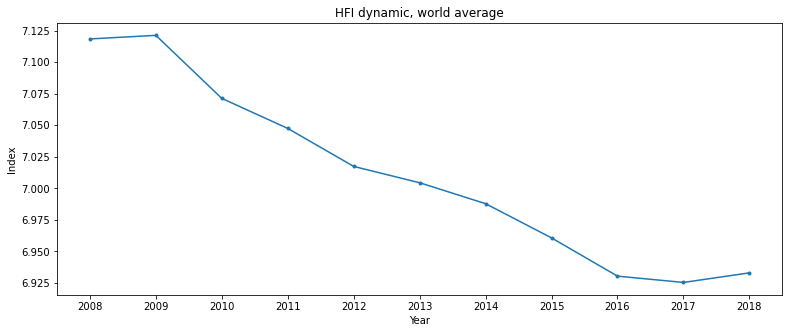

In [12]:
hf_score_dynamic.plot(
                      title = 'HFI dynamic, world average',
                      xlabel = 'Year',
                      ylabel = 'Index',
                      xticks = range(2008, 2019, 1),
                      style = '.-');

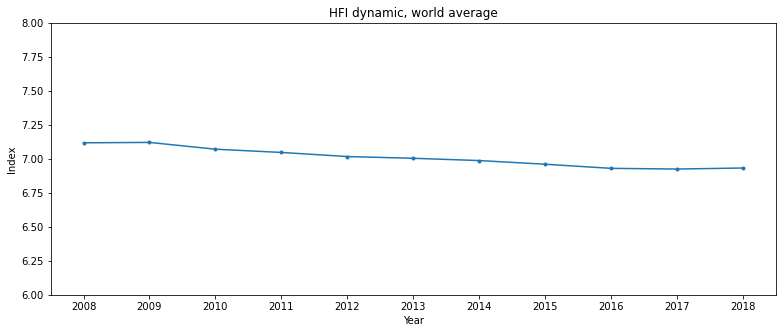

In [13]:
hf_score_dynamic.plot(
                      title = 'HFI dynamic, world average',
                      xlabel = 'Year',
                      ylabel = 'Index',
                      xticks = range(2008, 2019, 1),
                      ylim = (6,8),
                      style = '.-');

* First figure visually overstates the drop of indicator. Actually the index declined only from 7.1 to 6.9 during 10 years. The second one shows how perception changes depending on the y-axis limits.
* Overall trend is negative. 
* There is a slightly positive dynamic between 2008 and 2009.
* Between 2009 and 2016 the index was steadily declining.
* Between 2017 and 2018 a slightly positive dynamic again.

<a href="#0"><h4>Back to the top</h4></a>

<p id="1.2">
<h5>On average by region</h5>

Prepare pivot table with year as index and region as columns, calculating average HFI:

In [14]:
hf_score_dynamic_by_region = hfi_sample.pivot_table(index = 'year', columns = 'region',
                                                    values = 'hf_score', aggfunc = 'mean')

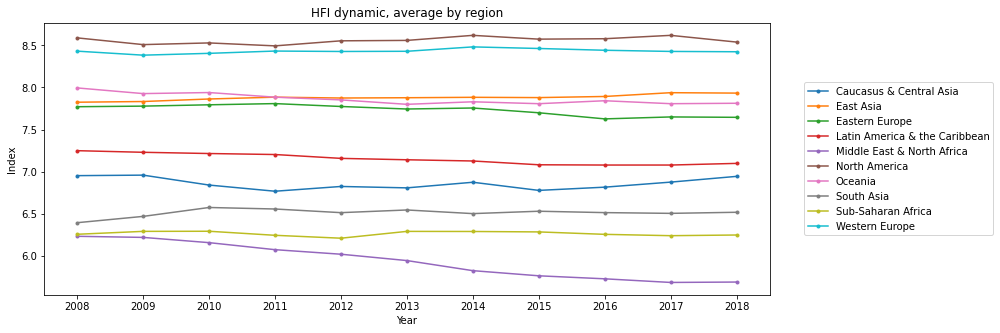

In [15]:
(hf_score_dynamic_by_region.plot(title = 'HFI dynamic, average by region',
                      xlabel = 'Year',
                      ylabel = 'Index',
                      xticks = range(2008, 2019, 1),
                      style = '.-').
                      legend(bbox_to_anchor = (1.04, 0.5), loc = "center left"));

* HFI of regions look quite stable over time.
* Only Middle East & North Africa shows quite clear trend - negative dynamic (but scale of change is within 1 unit)
* The values of index suggest "clustering" of regions
    - value around 8.5 (North America, Western Europe)
    - around 8.0 (East Asia, Oceania, Eastern Europe)
    - lower than 7.5 (Latin America & the Caribbean,Caucasus & Central Asia, South Asia,Sub-Saharan Africa, Middle East & North Africa)

For the clearer visualization consider two groups of regions separately: above and below the regional average.

<a href="#0"><h4>Back to the top</h4></a>

<p id="1.3">
<h5>For regions above average</h5>

Calculate average values by region and between regions:

In [16]:
hf_by_reg = hfi_sample.groupby('region').hf_score.mean().sort_values(ascending = False)
hf_mean_reg = round(hfi_sample.groupby('region').hf_score.mean().sort_values(ascending = False).mean(), 3)

In [17]:
print('Average HFI by region:')
print(hf_by_reg)
print()
print('Regional average')
print(hf_mean_reg)

Average HFI by region:
region
North America                    8.561
Western Europe                   8.433
East Asia                        7.881
Oceania                          7.864
Eastern Europe                   7.731
Latin America & the Caribbean    7.150
Caucasus & Central Asia          6.854
South Asia                       6.513
Sub-Saharan Africa               6.262
Middle East & North Africa       5.916
Name: hf_score, dtype: float64

Regional average
7.316


Make lists of regions above and below the regional average:

In [18]:
reg_over_mean = hf_by_reg[hf_by_reg >= hf_mean_reg].index
reg_below_mean = hf_by_reg[hf_by_reg < hf_mean_reg].index

Use the pivot table by years and regions from the above:

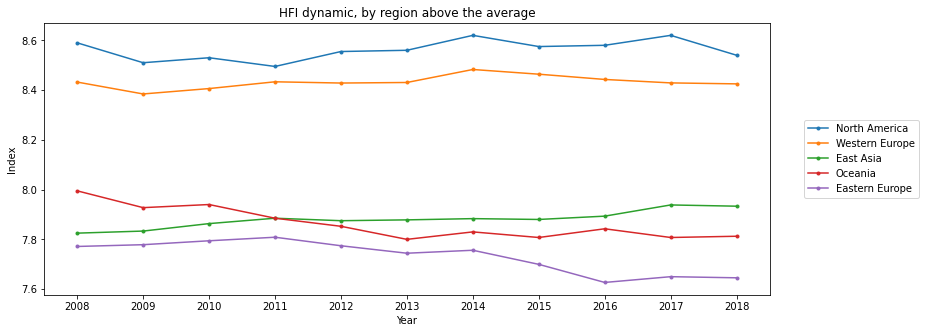

In [19]:
(hf_score_dynamic_by_region[reg_over_mean].
                      plot(title = 'HFI dynamic, by region above the average',
                      xlabel = 'Year',
                      ylabel = 'Index',
                      xticks = range(2008, 2019, 1),
                      style = '.-').
                      legend(bbox_to_anchor = (1.04, 0.5), loc = "center left"));

* Only Eastern Europe shows some negative trend (but scale of change is within less than 1 unit), other regions - quite stable.
* The highest values of index are in North America.
* The values of index in East Asia were lower than in Oceania until 2011 and the opposite afterwards.

##### For regions below average

Use the pivot table by years and regions from the above:

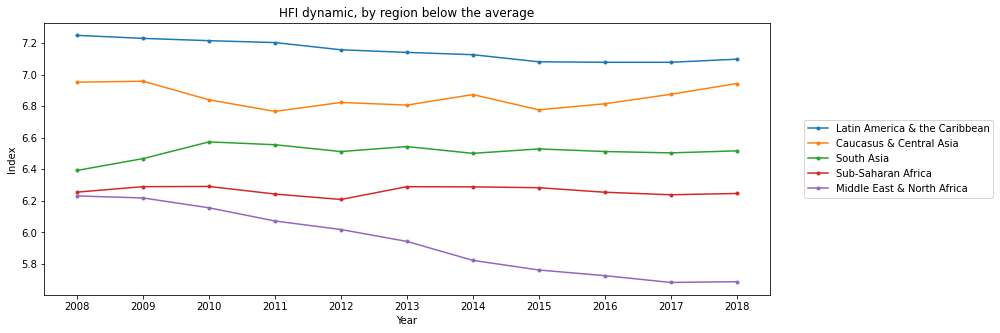

In [20]:
(hf_score_dynamic_by_region[reg_below_mean].
                      plot(title = 'HFI dynamic, by region below the average',
                      xlabel = 'Year',
                      ylabel = 'Index',
                      style = '.-',
                      xticks = range(2008, 2019, 1)).
                      legend(bbox_to_anchor = (1.04, 0.5), loc = "center left"));

* Only Middle East & North Africa shows a clear trend (negative) (but scale of change is within less than 1 unit).
* There is a slight decrease in Latin America & the Caribbean.

<a href="#0"><h4>Back to the top</h4></a>

<p id="1.4">
<h5>Russia: comparison with region and world</h5>

Put three plots on one canvas:<br>
* HFI of Russia by year
* average HFI in Eastern Europe region by year
* world average by year

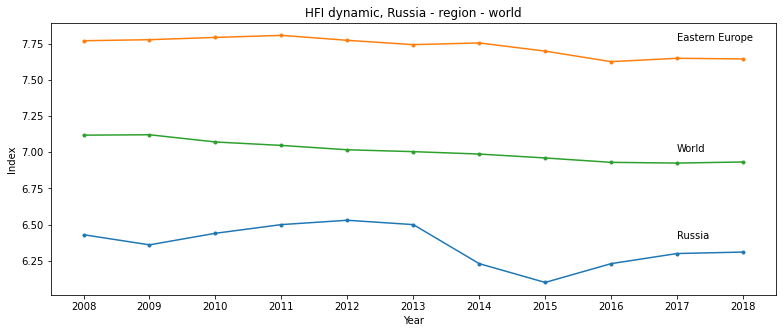

In [22]:
(hfi_sample[hfi_sample.countries == 'Russian Federation'][['year','hf_score']].
 set_index('year').
     plot(title = 'HFI dynamic, Russia - region - world',
     xlabel = 'Year', ylabel = 'Index', style = '.-',
     legend = False, xticks = range(2008, 2019, 1)).
         text(2017, 6.4, 'Russia'));

(hf_score_dynamic_by_region['Eastern Europe'].
 plot(xlabel = 'Year', ylabel = 'Index', style = '.-').
     text(2017, 7.77, 'Eastern Europe'));

hf_score_dynamic.plot(xlabel = 'Year', ylabel = 'Index', style = '.-').text(2017, 7, 'World');

* Over the given period Russia's index is lower than world average and Eastern Europe average.
* Russia's index shows higher volatility (but within 1 unit) than region's and world averages.
* Maximum value of index in Russia is in 2013, minimum - 2015.

<a href="#0"><h4>Back to the top</h4></a>

<p id="2">
<h4>Top countries for increase/decrease of HFI between 2008 and 2018</h4>

Prepare the dataframes.

Select the variables, filter 2008 and 2018, sort by year:

In [23]:
score_dif = hfi_sample[hfi_sample.year.isin([2008,2018])].loc[:,['year','countries','hf_score']].sort_values(by = 'year')

Add the column with difference of index between the years:

In [24]:
g = score_dif.groupby('countries')
score_dif['score_dif'] = g['hf_score'].apply(lambda x: x - x.shift())

We need countries that have index values for both years, as otherwise calculation of difference is not possible. Among the rows of year=2018 there are 162 values of index and 141 values of difference, as some countries do not have index values in 2008.

In [25]:
score_dif.groupby('year').count()

,countries,hf_score,score_dif
year,,,
2008,141,141,0
2018,162,162,141



Drop the nulls in score_dif column, 141 rows should be left:

In [26]:
print(score_dif.shape) 
score_dif = score_dif.dropna() 
print(score_dif.shape)

(303, 4)
(141, 4)


Select top-10 countries by the increase in index:

In [27]:
top_hf_dyn = score_dif.sort_values(by = 'score_dif', ascending = False).head(10)
top_hf_dyn.set_index('countries', inplace = True)
top_hf_dyn

,year,hf_score,score_dif
countries,,,
Sri Lanka,2018,6.72,1.14
Myanmar,2018,5.45,0.91
Zimbabwe,2018,5.59,0.62
Taiwan,2018,8.42,0.59
Malaysia,2018,6.90,0.53
Mozambique,2018,6.64,0.47
Kyrgyz Republic,2018,7.05,0.43
Croatia,2018,7.92,0.43
Dominican Republic,2018,7.37,0.41


Select top-10 countries by the decrease in index:

In [28]:
bottom_hf_dyn = score_dif.sort_values(by = 'score_dif').head(10)
bottom_hf_dyn.set_index('countries', inplace = True)
bottom_hf_dyn

,year,hf_score,score_dif
countries,,,
"Venezuela, RB",2018,4.08,-1.28
Syrian Arab Republic,2018,3.97,-1.16
"Egypt, Arab Rep.",2018,4.67,-1.09
Bahrain,2018,6.18,-0.95
Turkey,2018,6.27,-0.77
Nicaragua,2018,6.54,-0.75
"Iran, Islamic Rep.",2018,4.53,-0.69
Thailand,2018,6.37,-0.64
Mauritius,2018,7.55,-0.62


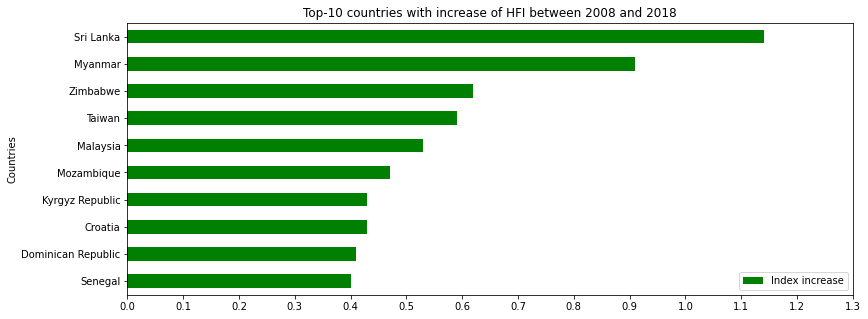

In [29]:
top_hf_dyn_pl = (top_hf_dyn.drop(['hf_score','year'], axis = 1).
                 plot(
                    kind = 'barh',
                    title = 'Top-10 countries with increase of HFI between 2008 and 2018',
                    xlabel = 'Countries',
                    xticks = np.arange(0, 1.4, 0.1),
                    color = 'g'));
                 
top_hf_dyn_pl = plt.gca().invert_yaxis();

leg = plt.legend()
leg.get_texts()[0].set_text('Index increase')

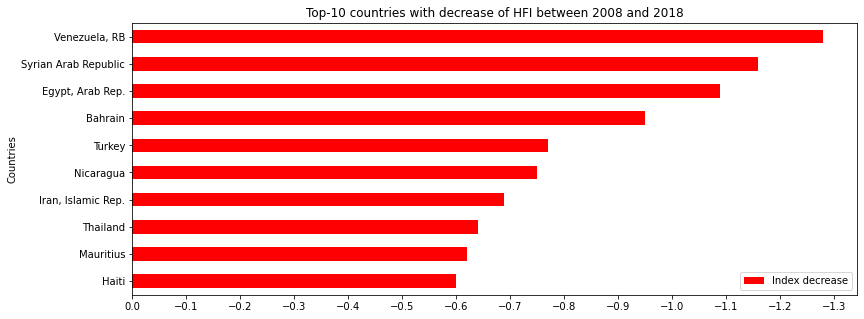

In [30]:
bottom_hf_dyn_pl = (bottom_hf_dyn.drop(['hf_score','year'], axis = 1).
                    plot(
                        kind = 'barh', 
                        title = 'Top-10 countries with decrease of HFI between 2008 and 2018',
                        xlabel = 'Countries',
                        xticks = np.arange(-1.3, 0.1, 0.1),
                        color = 'r'));

bottom_hf_dyn_pl = plt.gca().invert_yaxis();
bottom_hf_dyn_pl = plt.gca().invert_xaxis();

leg = plt.legend()
leg.get_texts()[0].set_text('Index decrease')

* Over the 10-year period the index has not changed significantly.
* Increase: the largest in Sri Lanka (by 1.1), in Senegal (10th place) - only by 0.4.
* There is only one European country among the top-10 countries with an increase - Croatia.
* Decrease: the largest in Venezuela (by 1.2), in Haiti (10th place) - only by 0.6.

<a href="#0"><h4>Back to the top</h4></a>

<p id="3">
<h4>Top countries by HFI in 2008 and 2018</h4>

Prepare two dataframes for 2008 and 2018: country, HFI, sort by HFI descending, first 10 rows:

In [31]:
top_2008 = (hfi_sample[hfi_sample.year == 2008].
            sort_values(by = 'hf_score', ascending = False).
            loc[:,['countries','hf_score']].
            set_index('countries').
            head(10))

top_2018 = (hfi_sample[hfi_sample.year == 2018].
            sort_values(by = 'hf_score', ascending = False).
            loc[:,['countries','hf_score']].
            set_index('countries').
            head(10))

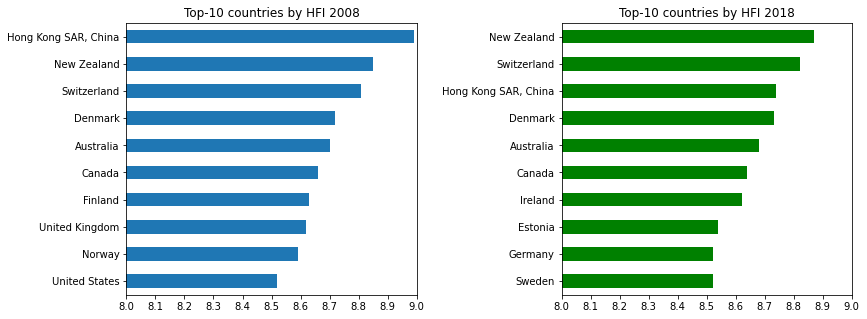

In [32]:
fig, ax = plt.subplots(1,2)

top_2008.plot(kind = 'barh', xlabel = '',
              ax = ax[0], title = "Top-10 countries by HFI 2008",
              legend = False, xlim = [8, 9], xticks = np.arange(8, 9.1, 0.1))
ax[0].invert_yaxis()

top_2018.plot(kind = 'barh', xlabel = '',
              ax = ax[1], title = "Top-10 countries by HFI 2018",
              legend = False, color = 'g', xlim = [8, 9], xticks = np.arange(8, 9.1, 0.1))
ax[1].invert_yaxis()

plt.subplots_adjust(wspace = 0.5)

* Range of values within the top-10 has almost no change between 2008 and 2018: from 8.5 to 9.
* List of countries in the top three places did not change, but the order changed: Hong Kong went down from 1st to 3rd place, Switzerland went up from 3rd to 2nd place, New Zealand went up from 2nd to 1st place.
* Denmark, Australia and Canada did not move from their places (4-6).
* List of countries in last three places was completely renewed. Finland, UK, Norway, USA left the top-10. Ireland, Estonia, Germany and Sweden entered the top-10.

<a href="#0"><h4>Back to the top</h4></a>

<p id="4">
<h4>Dynamic of HFI components</h4>

Leave only components of indexes (indicators). Prepare the grouping by year with calculation of average:

In [33]:
hfi_indics_dynamic = (hfi_sample.
                      drop(['hf_score','hf_rank','pf_score','pf_rank','ef_score','ef_rank'], axis = 1).
                      groupby('year').mean())

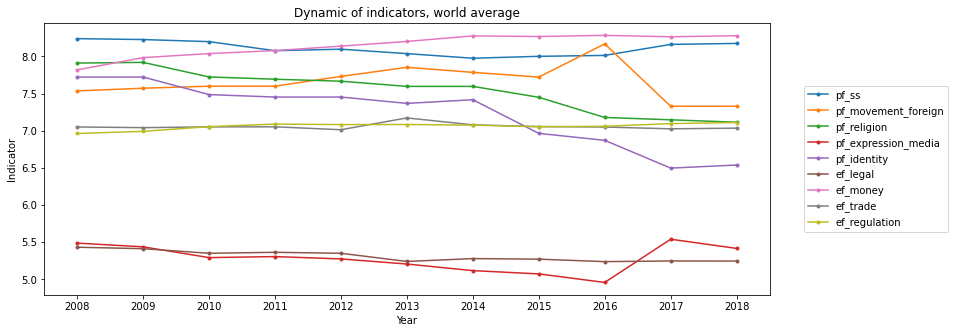

In [34]:
(hfi_indics_dynamic.plot(
                    title = 'Dynamic of indicators, world average',
                    xlabel = 'Year',
                    ylabel = 'Indicator',
                    xticks = range(2008, 2019, 1),
                    style = '.-').
                            legend(bbox_to_anchor = (1.04, 0.5), loc = "center left"));

Values of pf_expression_media and ef_legal stand out, plot them separately:

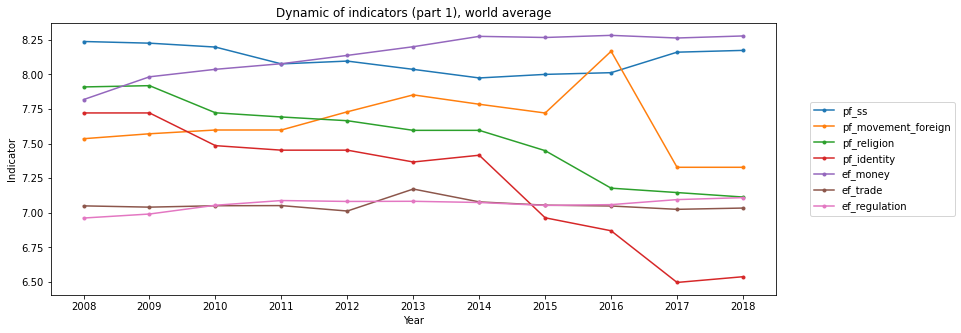

In [35]:
(hfi_indics_dynamic.drop(['pf_expression_media','ef_legal'], axis = 1).
                            plot(title = 'Dynamic of indicators (part 1), world average',
                            xlabel = 'Year',
                            ylabel = 'Indicator',
                            xticks = range(2008, 2019, 1),
                            style = '.-').
                                 legend(bbox_to_anchor = (1.04, 0.5), loc = "center left"));

* Such a number of indicators on one figure is not very readable.
* Nevertheless, pf_identity and pf_religion have some negative trends (but scale of change is within less than 1 unit).
* Indicator pf_movement_foreign jumped in 2016 (but scale of change is within less than 1 unit)
* From 2011 ef_money has the highest values.

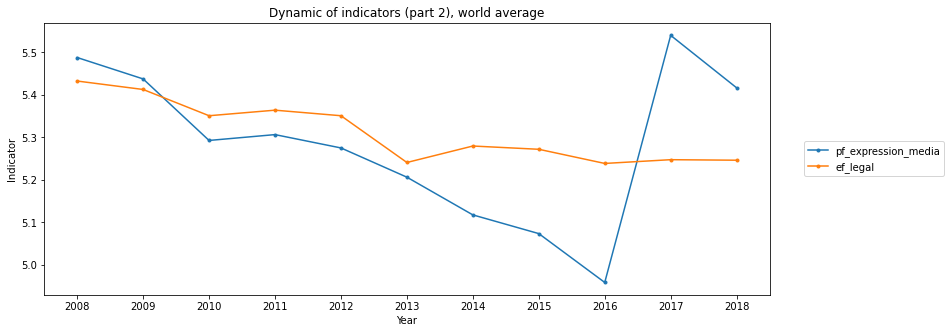

In [36]:
(hfi_indics_dynamic[['pf_expression_media','ef_legal']].
             plot(title = 'Dynamic of indicators (part 2), world average',
                  xlabel = 'Year',
                  ylabel = 'Indicator',
                  xticks = range(2008, 2019, 1),
                  style = '.-').
                         legend(bbox_to_anchor = (1.04, 0.5), loc = "center left"));


* Indicator pf_expression_media had a negative trend until 2016, then jumped and negative trend again (but scale of change is within less than 1 unit)

<a href="#0"><h4>Back to the top</h4></a>

<p id="5">
<h4>Dynamic of Russia's HFI and subindexes ranks</h4>

Filter Russia and select rank variables:

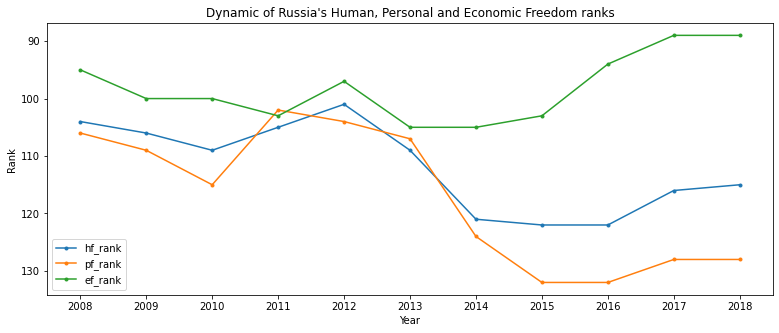

In [37]:
russia_rank = (hfi_sample[hfi_sample.countries == 'Russian Federation']
                           [['year','hf_rank','pf_rank','ef_rank']].
                               set_index('year').
                                plot(
                                title = "Dynamic of Russia's Human, Personal and Economic Freedom ranks",
                                xlabel = 'Year',
                                ylabel = 'Rank',
                                xticks = range(2008, 2019, 1),
                                style = '.-'));
russia_rank = plt.gca().invert_yaxis();

* Personal Freedom Rank had a significant decrease after 2013.
* At the same time, 2013 is the start of a positive trend of Economic Freedom Rank.
* Minimal values of Human Freedom rank in 2016 is probably related to decrease in Personal Freedom.
* Before 2013 all three ranks were quite close.
* From 2014 the difference between ranks became much more significant.
* Over the 10-year period Economic Freedom had higher values than other ranks.

<a href="#0"><h4>Back to the top</h4></a>

<p id="6">
<h4>Freedom of identity variable 2018 vs 2008</h4>

<p id="6.1">
<h5>By region</h5>

Prepare a pivot table with region as index and year (2008 and 2018) as columns, calculating average pf_identity:

In [38]:
ident_indic_by_region_08_18 = (hfi_sample[hfi_sample.year.isin([2008, 2018])].
                               pivot_table(index = 'region', columns = 'year',
                                           values = 'pf_identity', aggfunc = 'mean'))

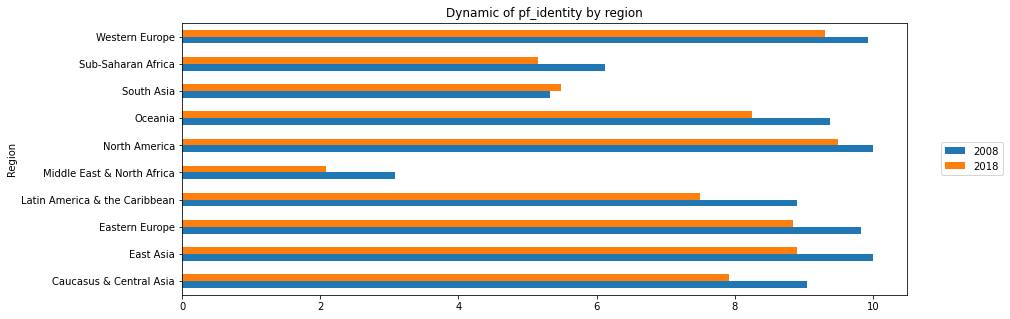

In [39]:
(ident_indic_by_region_08_18.plot(kind = 'barh',
                                title = 'Dynamic of pf_identity by region',
                                xlabel = 'Region').
                                     legend(bbox_to_anchor = (1.04, 0.5), loc = "center left"));


* The indicator decreased in all regions except South Asia.

Have a look at the dynamic of the indicator within the South Asia region. Region contains 17 countries.

In [40]:
hfi_sample[hfi_sample.year == 2018].groupby('region').countries.count()

region
Caucasus & Central Asia           6
East Asia                         6
Eastern Europe                   22
Latin America & the Caribbean    26
Middle East & North Africa       19
North America                     2
Oceania                           4
South Asia                       17
Sub-Saharan Africa               42
Western Europe                   18
Name: countries, dtype: int64

<a href="#0"><h4>Back to the top</h4></a>

<p id="6.2">
<h5>By country in South Asia</h5>

Prepare a pivot table with country as index (from South Asia) and year (2008 and 2018) as columns, calculating average pf_identity:

In [41]:
ident_indic_south_asia_08_18 = (
    hfi_sample[(hfi_sample.year.isin([2008, 2018])) & (hfi_sample.region == 'South Asia')].
            pivot_table(
            index = 'countries', columns = 'year', values = 'pf_identity', aggfunc = 'mean'))

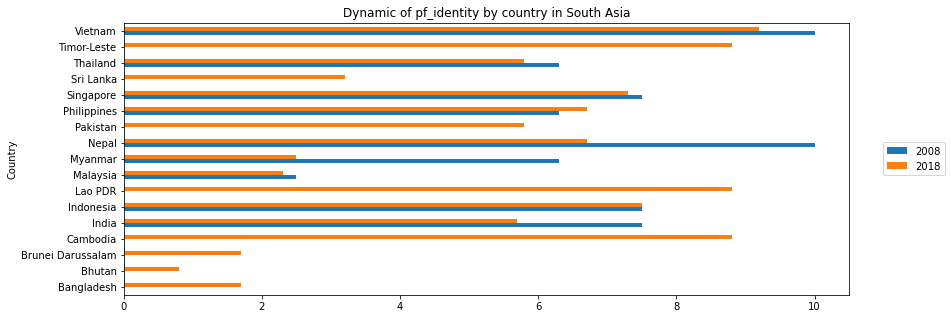

In [42]:
(ident_indic_south_asia_08_18.plot(kind = 'barh',
                                title = 'Dynamic of pf_identity by country in South Asia',
                                xlabel = 'Country').
                                     legend(bbox_to_anchor = (1.04, 0.5), loc = "center left"));

* Some countries have pf_identity data in 2018 but do not in 2008. Some of them have quite high values. Probably this is the reason for the increase in the region as a whole. There is a need to compare like-to-like.
* All countries show the decrease in indicator, except Philippines (increase) и Indonesia (no change).
* The highest value in 2018 is in Vietnam, the lowest in Bhutan.

<a href="#0"><h4>Back to the top</h4></a>

<p id="7">
<h4>Comparison of Russia and Iran by HFI and components in 2018</h4>

Check the correct spelling of Iran in the dataset. Filter Iran and Russia, 2018 and select the columns. Transpose in order to get indexes and indicators in rows.

In [43]:
hfi_sample[ hfi_sample['countries'].str.contains('iran', case = False) ]['countries'].unique()

array(['Iran, Islamic Rep.'], dtype=object)

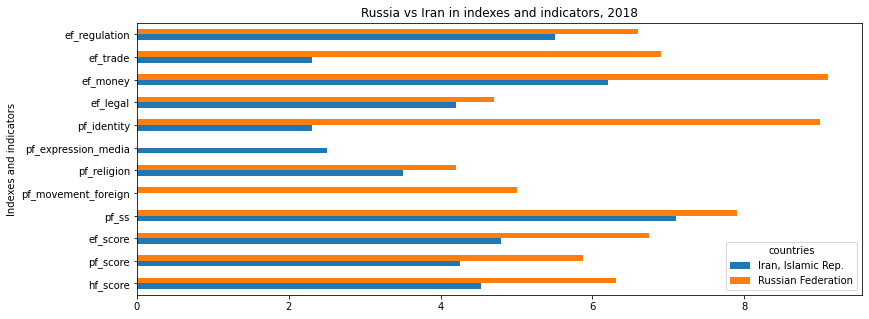

In [44]:
(hfi_sample[(hfi_sample.countries.isin(['Russian Federation', 'Iran, Islamic Rep.']))
                   & (hfi_sample.year == 2018)].
                         drop(['year','region','hf_rank','pf_rank','ef_rank'], axis = 1).
                             set_index('countries').
                                 transpose().
                                     plot(kind = 'barh',
                                     title = 'Russia vs Iran in indexes and indicators, 2018',
                                     xlabel = 'Indexes and indicators'));

* Recently some people compare Russia and Iran, have a look at their indicators.
* In 2018 Russia outperforms Iran in all indicators. 
* Indicator pf_expression_media in Russia is either the minimal zero value or no data.
* The same is with pf_movement_foreign in Iran.
* The most significant difference between countries is in pf_identity.
* The smallest difference -  ef_legal.

<a href="#0"><h4>Back to the top</h4></a>

<p id="8">
<h4>Distribution of HFI and components in 2018</h4>

Filter 2018 and select the columns:

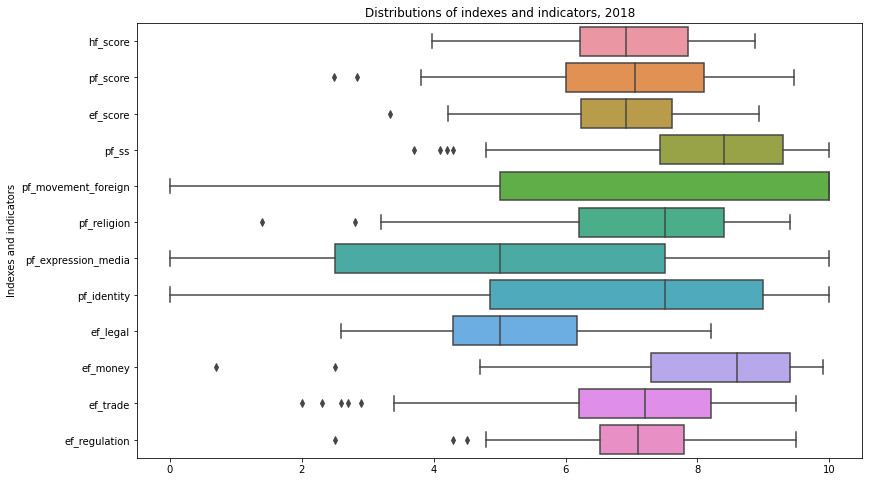

In [45]:
plt.figure(figsize = (13, 8))
score_indics_box_18 = (sns.boxplot(
                           data = hfi_sample[hfi_sample.year == 2018].
                                        drop(['year','countries','region','hf_rank','pf_rank','ef_rank'], axis = 1),
                                           orient = 'h'))

score_indics_box_18.set(ylabel = 'Indexes and indicators')

score_indics_box_18.set_title('Distributions of indexes and indicators, 2018');

* Indicators pf_expression_media, pf_identity and pf_movement_foreign have the widest range (max-min).
* Indicators ef_regulation and ef_score have the narrowest IQR
* If some indicator has outliers, then only in the left tail.
* Right tails are mostly shorter than left ones, i.e. low values are less frequent than high.

<a href="#0"><h4>Back to the top</h4></a>

<p id="9">
<h4>Correlation of HFI and components</h4>

Plot scatter plots for HFi and indicators (except pf_movement_foreign and pf_identity, as they are probably of discrete type and not very informative for scatter plots):

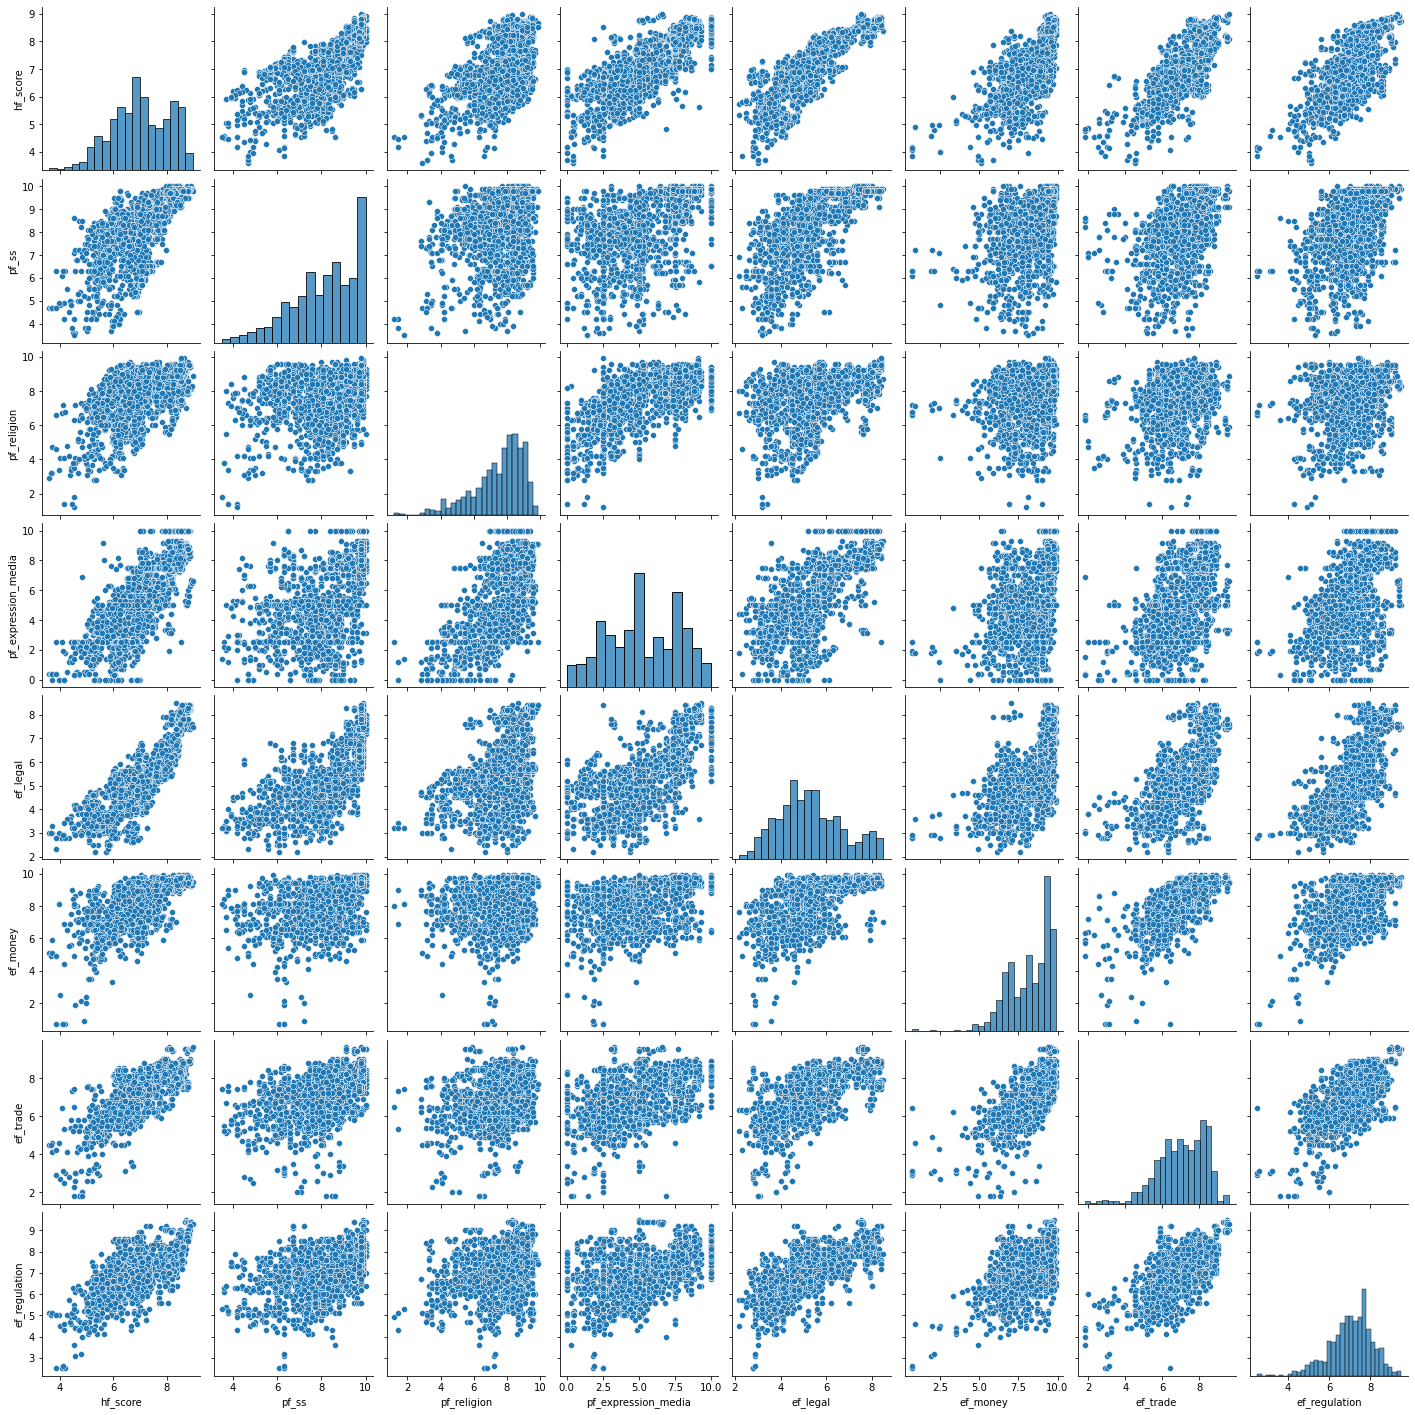

In [46]:
sns.pairplot(hfi_sample[['hf_score',
                       'pf_ss','pf_religion','pf_expression_media',
                        'ef_legal','ef_money','ef_trade','ef_regulation']]);

* Clouds between HFI and indicators show to one extent or another positive linear relationship, i.e. when HFI value increases indicators tend to increase.
* Relationship between pf_ss and ef_legal look a bit non-linear, like hyperbola.
* The following pairs can be checked for the positive linear correlation:
    - pf_religion and pf_expression_media
    - ef_legal and ef_regulation
    - ef_legal and ef_trade
    - ef_money and ef_trade
    - ef_trade and ef_regulation

<a href="#0"><h4>Back to the top</h4></a>

<p id="10">
<h4>HFI and components on average by region</h4>

Group dataframe by region and calculate average of indexes and indicators over the years.

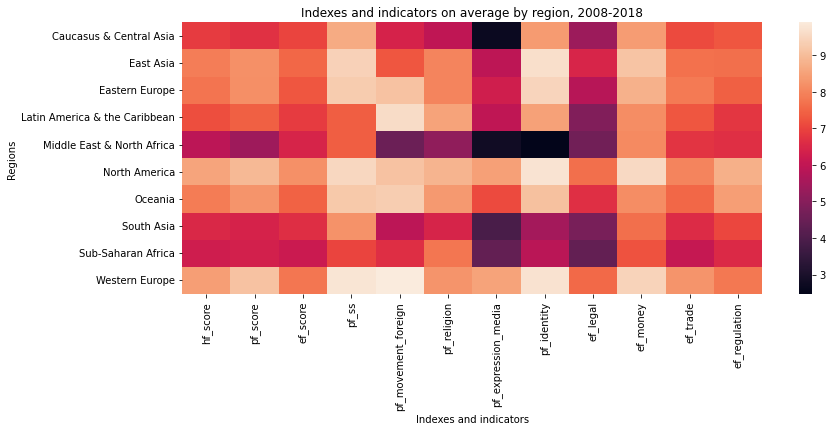

In [47]:
heatmap_reg_indic = (sns.heatmap(hfi_sample.drop(['year','hf_rank','pf_rank','ef_rank'], axis = 1).
                                 groupby('region').mean()))
heatmap_reg_indic.set(xlabel = 'Indexes and indicators')
heatmap_reg_indic.set(ylabel = 'Regions')
heatmap_reg_indic.set_title('Indexes and indicators on average by region, 2008-2018');

* Indicators pf_identity and pf_expression_media have the largest variation between the regions.
* North America and Western Europe have similar levels of indicators.
* The regions Caucasus&Central Asia and Middle East&North Africa have the largest variation between the indicators.
* Indicators hf_score, ef_score, ef_trade and ef_regulation have similar levels across the regions.

<a href="#0"><h4>Back to the top</h4></a>

<p id="11">
<h4>HFI distribution 2018 vs 2008</h4>

Filter HFI in 2008 and 2018:

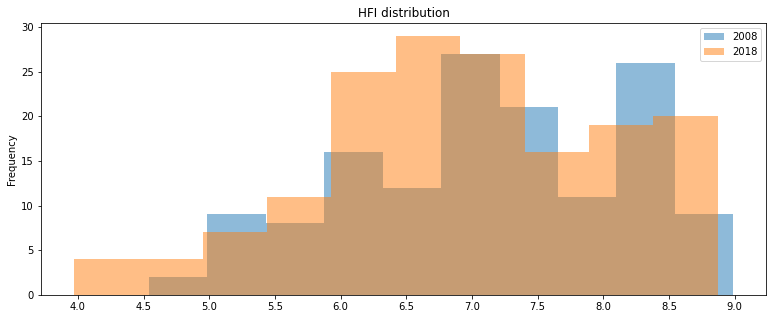

In [48]:
hfi_sample[hfi_sample.year == 2008].hf_score.plot(kind = 'hist',
                                                 alpha = 0.5, legend = True, xticks = np.arange(3, 9.1, 0.5))

hfi_sample[hfi_sample.year == 2018].hf_score.plot(kind = 'hist',
                                                 alpha = 0.5,
                                                 legend = True,
                                                 title = 'HFI distribution')
leg = plt.legend()
leg.get_texts()[0].set_text('2008')
leg.get_texts()[1].set_text('2018')

* In 2008 the distribution was less concentrated, two modes around 7 and around 8.3.
* In 2018 the distribution is more concentrated, the most part is around the values 6-7.5.
* In both years the right tail is bigger than th eleft one: low values are less frequent than high.
* In 2018 the left tail lenghtened, even lower values appeared.

<a href="#0"><h4>Back to the top</h4></a>